In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Task 1: Query Product Ranking

In [ ]:
!unzip "/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/sample_submission-v0.2.zip" -d "/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/"

Archive:  /content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/sample_submission-v0.2.zip
replace /content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/sample_submission-v0.2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip "/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/test_public-v0.2.zip" -d "/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/"

Archive:  /content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/test_public-v0.2.zip
replace /content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/test_public-v0.2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip "/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/train-v0.2.zip" -d "/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/"

Archive:  /content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/train-v0.2.zip
replace /content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/train-v0.2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip "/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/product_catalogue-v0.2.zip" -d "/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/"

Archive:  /content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/product_catalogue-v0.2.zip
  inflating: /content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/product_catalogue-v0.2.csv  


In [ ]:
# prod1 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/sample_submission-v0.2.csv")
train1 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/train-v0.2.csv")
test1 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/test_public-v0.2.csv")
sample1 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task1/sample_submission-v0.2.csv")

In [ ]:
train1.head()

query_id                         query query_locale  product_id  esci_label
0         0  !awnmower tires without rims           us  B00004RA3F  irrelevant
1         0  !awnmower tires without rims           us  B0018TWDOI       exact
2         0  !awnmower tires without rims           us  B005O5Y3QI       exact
3         0  !awnmower tires without rims           us  B0089RA0HY  substitute
4         0  !awnmower tires without rims           us  B0089RNSNM       exact

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 5.9 MB/s 
     |████████████████████████████████| 1.0 MB 60.5 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 1.1 MB 58.5 MB/s 
     |████████████████████████████████| 95 kB 5.2 MB/s 
     |████████████████████████████████| 965 kB 49.9 MB/s 
     |████████████████████████████████| 943 kB 81.3 MB/s 
     |████████████████████████████████| 749 kB 69.0 MB/s 
     |████████████████████████████████| 133 kB 93.0 MB/s 
     |████████████████████████████████| 11.1 MB 88.2 MB/s 
     |████████████████████████████████| 1.5 MB 58.6 MB/s 
     |████████████████████████████████| 366 kB 75.4 MB/s 
     |████████████████████████████████| 78 kB 8.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |█████████████████████

In [ ]:
from dataprep.eda import create_report, plot_missing

DataPrep Report
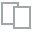
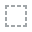
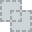
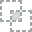
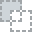
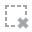
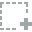
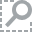
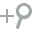
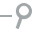
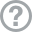
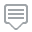
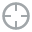
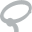
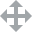
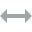
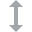
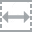
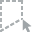
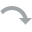
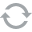
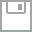
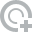
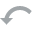
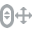
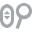
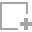
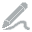
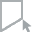
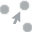
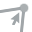
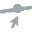

In [ ]:
create_report(train1)

In [ ]:
# Changing esci_label
train1["esci_label"].replace({"exact" : 1.0, "substitute" : 0.1, "complement" : 0.01, "irrelevant" : 0.0}, inplace = True)

In [ ]:
train1.columns

Index(['query_id', 'query', 'query_locale', 'product_id', 'esci_label'], dtype='object')

In [ ]:
# Changing datatype 
train1 = train1.astype({"esci_label" : "int64", "query_id" : "category", "query" : "category", "query_locale" : "category", "product_id" : "category"})

In [ ]:
train1.to_numpy()

array([[0, '!awnmower tires without rims', 'us', 'B00004RA3F',
        'irrelevant'],
       [0, '!awnmower tires without rims', 'us', 'B0018TWDOI', 'exact'],
       [0, '!awnmower tires without rims', 'us', 'B005O5Y3QI', 'exact'],
       ...,
       [33776, 'ﾒｽﾃｨﾝ', 'jp', 'B088D57W66', 'exact'],
       [33776, 'ﾒｽﾃｨﾝ', 'jp', 'B088FR58NN', 'complement'],
       [33776, 'ﾒｽﾃｨﾝ', 'jp', 'B088QJ34Q1', 'exact']], dtype=object)

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781738 entries, 0 to 781737
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   query_id      781738 non-null  category
 1   query         781738 non-null  int32   
 2   query_locale  781738 non-null  int8    
 3   product_id    781738 non-null  string  
 4   esci_label    781738 non-null  int64   
dtypes: category(1), int32(1), int64(1), int8(1), string(1)
memory usage: 19.9 MB


In [ ]:
train1['query']= train1['query'].cat.codes

In [ ]:
train1['query_locale']= train1['query_locale'].cat.codes
train1['product_id']= train1['product_id'].cat.codes

In [ ]:
train1.head()

query_id query  query_locale  product_id  esci_label
0        0     0             2       28760           0
1        0     0             2       46422           1
2        0     0             2       74797           1
3        0     0             2       83601           0
4        0     0             2       83602           1

In [ ]:
train1.head()

query_id                         query query_locale  product_id  esci_label
0         0  !awnmower tires without rims           us  B00004RA3F  irrelevant
1         0  !awnmower tires without rims           us  B0018TWDOI       exact
2         0  !awnmower tires without rims           us  B005O5Y3QI       exact
3         0  !awnmower tires without rims           us  B0089RA0HY  substitute
4         0  !awnmower tires without rims           us  B0089RNSNM       exact

# Task 2: Multiclass Product Classification 

In [ ]:
prod_2 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task2/product_catalogue-v0.2.csv", encoding = 'utf-8', header = None, sep = '\t')

In [ ]:
sample_2 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task2/sample_submission-v0.2.csv")
test_2 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task2/test_public-v0.2.csv")
train_2 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task2/train-v0.2.csv")

In [ ]:
train_2.head()

example_id       query  product_id query_locale esci_label
0           0  11 degrees  B079VKKJN7           es      exact
1           1  11 degrees  B079Y9VRKS           es      exact
2           2  11 degrees  B07D2DDCZH           es      exact
3           3  11 degrees  B07DP4LM9H           es      exact
4           4  11 degrees  B07G37B9HP           es      exact

In [ ]:
test_2.head()

example_id             query  product_id query_locale
0     2227371  2 camas compacto  B06X3ZWQ72           es
1     2227372  2 camas compacto  B06Y4QZWBJ           es
2     2227373  2 camas compacto  B0788QGP71           es
3     2227374  2 camas compacto  B079HXV34F           es
4     2227375  2 camas compacto  B07CJMZM94           es

In [ ]:
# missing value 
train_2miss = train_2.dropna(axis=0)

DataPrep Report
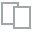
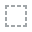
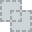
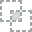
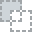
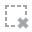
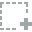
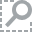
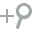
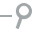
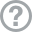
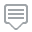
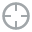
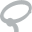
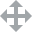
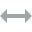
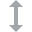
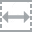
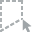
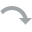
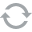
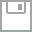
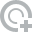
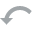
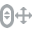
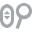
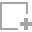
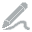
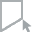
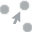
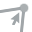
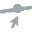

In [ ]:
# Visualization using DataPrep
create_report(train_2miss)

In [ ]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834744 entries, 0 to 1834743
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   example_id    int64 
 1   query         object
 2   product_id    object
 3   query_locale  object
 4   esci_label    object
dtypes: int64(1), object(4)
memory usage: 70.0+ MB


In [ ]:
train_2.isnull().sum()

example_id      0
query           0
product_id      0
query_locale    0
esci_label      0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


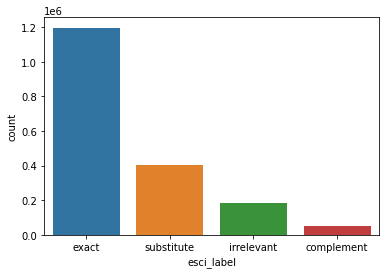

In [ ]:
# Check for Class Imbalance 
# Visualize target variables 
g = sns.countplot(train_2miss['esci_label'])
g.set_xticklabels(['exact','substitute', 'irrelevant', 'complement'])
plt.show()

## 2.1 Class Imbalance

In [ ]:
# Import library
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
train_label = train_2miss.copy()
train_label['esci_label_code'] = le.fit_transform(train_label['esci_label'].values)
train_label = train_label.drop_duplicates('esci_label')
print(train_label)

    example_id              query  product_id query_locale  esci_label  \
0            0         11 degrees  B079VKKJN7           es       exact   
21          21  144 preservativos  B00XACW13O           es  substitute   
49          49        28 dellorto  B012NTBJJG           es  irrelevant   
53          53        28 dellorto  B071V8T7YX           es  complement   

    esci_label_code  
0                 1  
21                3  
49                2  
53                0  


In [ ]:
train_2miss.head()

example_id       query  product_id query_locale esci_label
0           0  11 degrees  B079VKKJN7           es      exact
1           1  11 degrees  B079Y9VRKS           es      exact
2           2  11 degrees  B07D2DDCZH           es      exact
3           3  11 degrees  B07DP4LM9H           es      exact
4           4  11 degrees  B07G37B9HP           es      exact

In [ ]:
# Label Encoding 
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column "esci_label"
train_2miss['esci_label'] = label_encoder.fit_transform(train_2miss['esci_label'])

# Encode labels in column "query"
train_2miss['query'] = label_encoder.fit_transform(train_2miss['query'])

# Encode labels in column "product_id"
train_2miss['product_id'] = label_encoder.fit_transform(train_2miss['product_id'])

# Encode labels in column "product_id"
train_2miss['query_locale'] = label_encoder.fit_transform(train_2miss['query_locale'])

In [ ]:
X = train_2miss[['example_id', 'query', 'product_id', 'query_locale']]
y = train_2miss[['esci_label']]

In [ ]:
# Split into train & test dataset 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = .75)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Class Imbalance for testing dataset
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


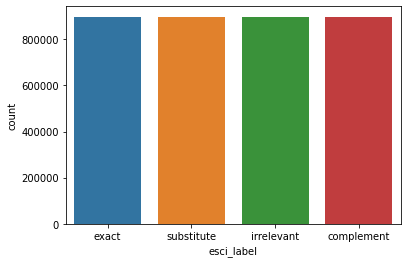

In [ ]:
# Visualize target variables 
g = sns.countplot(y_smote['esci_label'])
g.set_xticklabels(['exact','substitute', 'irrelevant', 'complement'])
plt.show()

## 2.2 Multiclass Logitic Regression 

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from sklearn import linear_model 

In [ ]:
lm = linear_model.LogisticRegression(multi_class = "ovr", solver = "liblinear")
lm.fit(X_smote, y_smote.values.ravel())

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
# Predictions
lm.score(X_test_smote, y_test_smote)

0.10671570529730579

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[140358,   4715, 107071,  46941],
       [135704,   4246,  97757,  61378],
       [106307,   4255, 137394,  51129],
       [115958,   3672, 123756,  55699]])

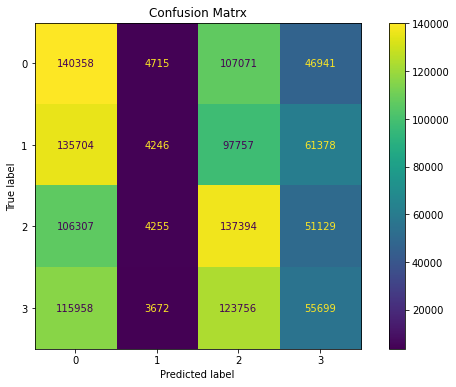

In [ ]:
# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')

disp =metrics.plot_confusion_matrix(lm, X_test_smote, y_test_smote, ax = ax)
disp.confusion_matrix

In [ ]:
# Classification report 
print(metrics.classification_report(y_test_smote, lm.predict(X_test_smote)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13400
           1       0.65      1.00      0.79    299085
           2       0.00      0.00      0.00     45539
           3       0.08      0.00      0.00    100662

    accuracy                           0.65    458686
   macro avg       0.18      0.25      0.20    458686
weighted avg       0.44      0.65      0.51    458686



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
y_pred = lm.predict(X_test_smote)
f1 = f1_score(y_test_smote, y_pred, average = "micro")
f1

0.28227510573917114

In [ ]:
# Model Tuning
# Create first pipeline for base without reducing features.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_smote, y_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-pac

## 2.3 Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
tree_model = DecisionTreeClassifier().fit(X_smote, y_smote.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[  3526,   5048,   2077,   2749],
       [ 25861, 177692,  36825,  58707],
       [  4241,  15148,  15673,  10477],
       [  8491,  39202,  14895,  38074]])

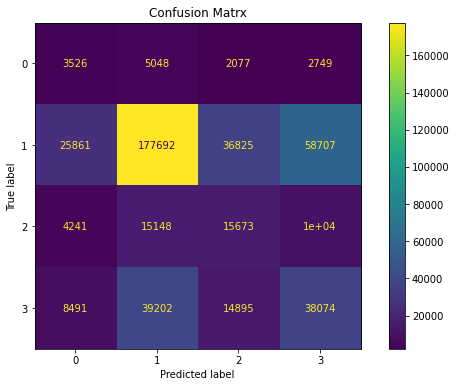

In [ ]:
# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(tree_model, X_test, y_test, ax = ax)
disp.confusion_matrix

In [ ]:
# Classification report 
print(metrics.classification_report(y_test, tree_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.08      0.26      0.13     13400
           1       0.75      0.59      0.66    299085
           2       0.23      0.34      0.27     45539
           3       0.35      0.38      0.36    100662

    accuracy                           0.51    458686
   macro avg       0.35      0.39      0.36    458686
weighted avg       0.59      0.51      0.54    458686



In [ ]:
# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
y_pred = tree_model.predict(X_test_smote)
f1 = f1_score(y_test_smote, y_pred, average = "micro")
f1

0.39413043114833574

## 2.4 SVM Classifier

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_smote, y_smote.values.ravel())
svm_predictions = svm_model_linear.predict(X_test)

# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(svm_model_linear, X_test, y_test, ax = ax)
disp.confusion_matrix

# Classification report 
print(metrics.classification_report(y_test, svm_predictions))

# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
f1 = f1_score(y_test, svm_predictions, average = "micro")
f1

## 2.5 KNN Classifier 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.38      0.30      0.34    299085
           1       0.34      0.44      0.38    299085
           2       0.36      0.33      0.35    299085
           3       0.32      0.32      0.32    299085

    accuracy                           0.35   1196340
   macro avg       0.35      0.35      0.35   1196340
weighted avg       0.35      0.35      0.35   1196340



0.34781082301018107

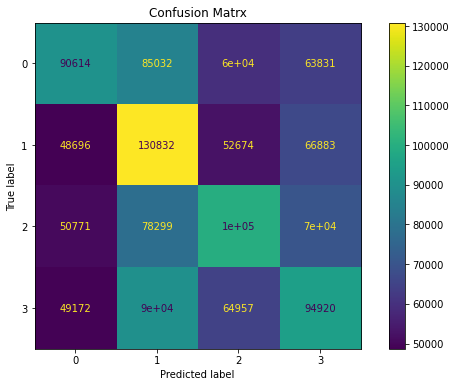

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_smote, y_smote.values.ravel())
knn_predictions = knn.predict(X_test_smote)

# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(knn, X_test_smote, y_test_smote, ax = ax)
disp.confusion_matrix

# Classification report 
print(metrics.classification_report(y_test_smote, knn_predictions))

# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
f1 = f1_score(y_test_smote, knn_predictions, average = "micro")
f1

## 2.6 Naive Bayes Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.32      0.34      0.33    299085
           1       0.32      0.45      0.38    299085
           2       0.31      0.40      0.35    299085
           3       0.26      0.07      0.10    299085

    accuracy                           0.31   1196340
   macro avg       0.30      0.31      0.29   1196340
weighted avg       0.30      0.31      0.29   1196340



0.3140904759516525

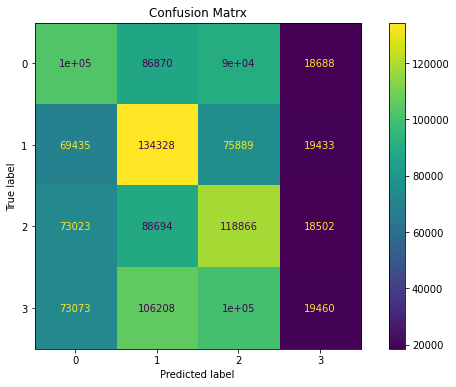

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_smote, y_smote.values.ravel())
gnb_predictions = gnb.predict(X_test_smote)

# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(gnb, X_test_smote, y_test_smote, ax = ax)
disp.confusion_matrix

# Classification report 
print(metrics.classification_report(y_test_smote, gnb_predictions))

# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
f1 = f1_score(y_test_smote, gnb_predictions, average = "micro")
f1

## 2.7 Random Forest Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.35      0.25      0.29     13400
           1       0.75      0.87      0.80    299085
           2       0.47      0.32      0.38     45539
           3       0.50      0.36      0.42    100662

    accuracy                           0.68    458686
   macro avg       0.52      0.45      0.47    458686
weighted avg       0.66      0.68      0.66    458686



0.6829203420204671

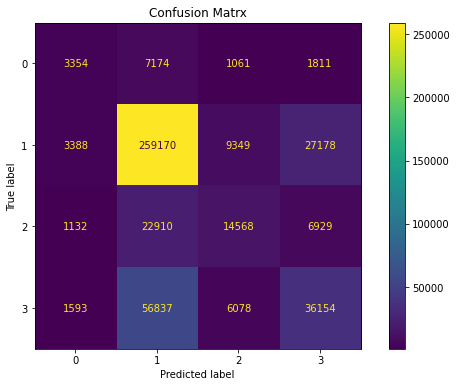

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42).fit(X_train, y_train.values.ravel())
random_pred = randomforest.predict(X_test)

# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(randomforest, X_test, y_test, ax = ax)
disp.confusion_matrix

# Classification report 
print(metrics.classification_report(y_test, random_pred))

# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
f1 = f1_score(y_test, random_pred, average = "micro")
f1

# Task 3: Product Substitute Identification (Binary Classification)

In [ ]:
sample_3 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task3/sample_submission-v0.2 (1).csv")
test_3 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task3/test_public-v0.2.csv")
train_3 = pd.read_csv("/content/drive/MyDrive/DataScience/FinalProject_ProductSearch/Task3/train-v0.2.csv")

In [ ]:
train_3.head()

example_id       query  product_id query_locale substitute_label
0           0  11 degrees  B079VKKJN7           es    no_substitute
1           1  11 degrees  B079Y9VRKS           es    no_substitute
2           2  11 degrees  B07D2DDCZH           es    no_substitute
3           3  11 degrees  B07DP4LM9H           es    no_substitute
4           4  11 degrees  B07G37B9HP           es    no_substitute

In [ ]:
train_3['substitute_label'].unique()

array(['no_substitute', 'substitute'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


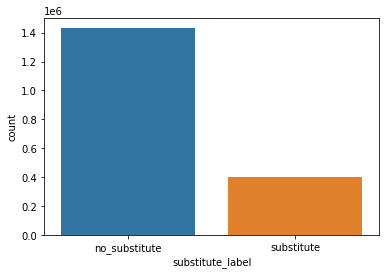

In [ ]:
# Check for Class Imbalance 
# Visualize target variables
import seaborn as sns 
import matplotlib.pyplot as plt
g = sns.countplot(train_3['substitute_label'])
g.set_xticklabels(['no_substitute','substitute'])
plt.show()

DataPrep Report
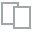
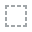
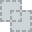
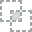
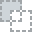
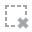
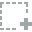
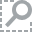
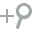
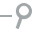
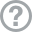
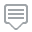
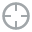
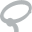
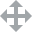
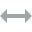
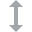
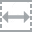
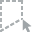
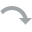
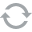
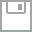
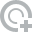
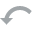
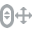
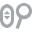
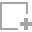
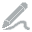
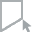
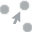
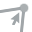
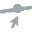

In [ ]:
create_report(train_3)

## 3.1 Class Imbalance with SMOTE

In [ ]:
# Import library
import imblearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_label = train_3.copy()
train_label['substitute_label_encode'] = le.fit_transform(train_label['substitute_label'].values)
train_label = train_label.drop_duplicates('substitute_label')
print(train_label)

    example_id              query  product_id query_locale substitute_label  \
0            0         11 degrees  B079VKKJN7           es    no_substitute   
21          21  144 preservativos  B00XACW13O           es       substitute   

    substitute_label_encode  
0                         0  
21                        1  


In [ ]:
train_3.columns 

Index(['example_id', 'query', 'product_id', 'query_locale',
       'substitute_label'],
      dtype='object')

In [ ]:
# Label Encoding 
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column "esci_label"
train_3['substitute_label'] = label_encoder.fit_transform(train_3['substitute_label'])

# Encode labels in column "query"
train_3['query'] = label_encoder.fit_transform(train_3['query'])

# Encode labels in column "product_id"
train_3['product_id'] = label_encoder.fit_transform(train_3['product_id'])

# Encode labels in column "product_id"
train_3['query_locale'] = label_encoder.fit_transform(train_3['query_locale'])

In [ ]:
train_3.head()

example_id  query  product_id  query_locale  substitute_label
0           0   1194      600833             0                 0
1           1   1194      602019             0                 0
2           2   1194      643339             0                 0
3           3   1194      660426             0                 0
4           4   1194      690278             0                 0

In [ ]:
X = train_3[['example_id', 'query', 'product_id', 'query_locale']]
y = train_3[['substitute_label']]

# Split into train & test dataset 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = .75)

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Class Imbalance for testing dataset
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


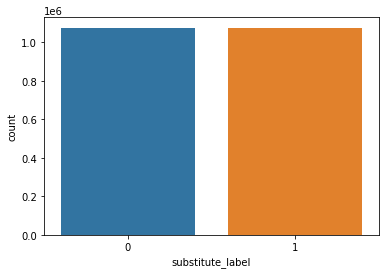

In [ ]:
# Visualize target variables 
g = sns.countplot(y_smote['substitute_label'])
#g.set_xticklabels(['exact','substitute', 'irrelevant', 'complement'])
plt.show()

## 3.2 Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    358024
           1       0.00      0.00      0.00    100662

    accuracy                           0.78    458686
   macro avg       0.39      0.50      0.44    458686
weighted avg       0.61      0.78      0.68    458686



0.7805426806137532

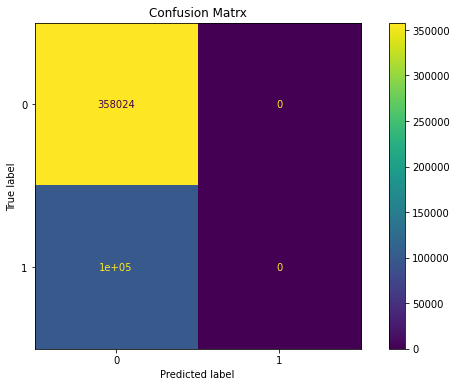

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train.values.ravel())
LR_pred = LR.predict(X_test)

# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(LR, X_test, y_test, ax = ax)
disp.confusion_matrix

# Classification report 
print(metrics.classification_report(y_test, LR_pred))

# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
f1 = f1_score(y_test, LR_pred, average = "micro")
f1

## 3.3 Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.LinearSVC().fit(X_smote, y_smote.values.ravel())
SVM_pred = SVM.predict(X_test_smote)

# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(SVM, X_test_smote, y_test_smote, ax = ax)
disp.confusion_matrix

# Classification report 
print(metrics.classification_report(y_test_smote, SVM_pred))

# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
f1 = f1_score(y_test_smote, SVM_pred, average = "micro")
f1

## 3.4 Random Forest 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    358024
           1       0.00      0.00      0.00    100662

    accuracy                           0.78    458686
   macro avg       0.39      0.50      0.44    458686
weighted avg       0.61      0.78      0.68    458686



0.7805426806137532

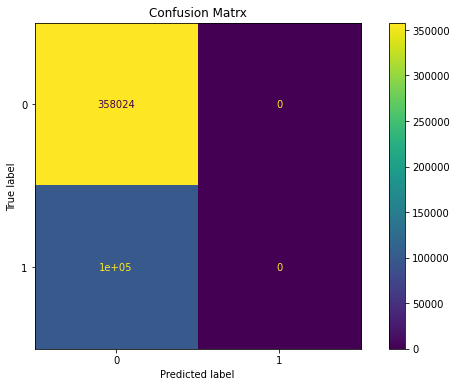

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train.values.ravel())
RF_pred = RF.predict(X_test)

# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(RF, X_test, y_test, ax = ax)
disp.confusion_matrix

# Classification report 
print(metrics.classification_report(y_test, RF_pred))

# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
f1 = f1_score(y_test, RF_pred, average = "micro")
f1

## 3.5 Neural Networks 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.79      0.25      0.37    358024
           1       0.22      0.76      0.34    100662

    accuracy                           0.36    458686
   macro avg       0.50      0.50      0.36    458686
weighted avg       0.66      0.36      0.37    458686



0.3591956153010992

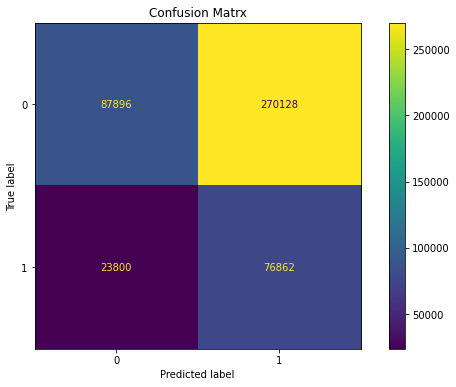

In [ ]:
from sklearn.neural_network import MLPClassifier 

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter = 1000).fit(X_train, y_train.values.ravel())
NN_pred = NN.predict(X_test)

# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(NN, X_test, y_test, ax = ax)
disp.confusion_matrix

# Classification report 
print(metrics.classification_report(y_test, NN_pred))

# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
f1 = f1_score(y_test, NN_pred, average = "micro")
f1

## 3.6 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1).fit(X_smote, y_smote.values.ravel())
KNN_pred = knn.predict(X_test_smote)

# Confusion Matrix : Visualize Performance of model
from sklearn import metrics 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(knn, X_test_smote, y_test_smote, ax = ax)
disp.confusion_matrix

# Classification report 
print(metrics.classification_report(y_test_smote, KNN_pred))

# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
f1 = f1_score(y_test_smote, KNN_pred, average = "micro")
f1

KeyboardInterrupt: ignored

## 3.6 Bagging Decision Tree (Ensemble Learning)

In [ ]:
from sklearn.ensemble import BaggingClassifier


## 3.7

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
bbc = BalancedBaggingClassifier(random_state=42).fit(X_train, y_train)
bbc_pred = bbc.predict(X_test)

# Micro-averaging F1_score (four classes are imbalance) - computes a global average F1 score by counting the sum of TP, FP, FN values across all classes 
from sklearn.metrics import f1_score 
f1 = f1_score(y_test, bbc_pred, average = "micro")
f1

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: ignored